In [68]:
#merge datasets
#eda analysis
#vaca tools?

import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('DataSets/Disease_symptom_and_patient_profile_dataset.csv')

del df['Outcome Variable']
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
dtypes: int64(1), object(8)
memory usage: 24.7+ KB


In [71]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
dtype: int64

In [72]:
df.describe()

,Age
count,349.000000
mean,46.323782
std,13.085090
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


<Axes: xlabel='Gender', ylabel='count'>

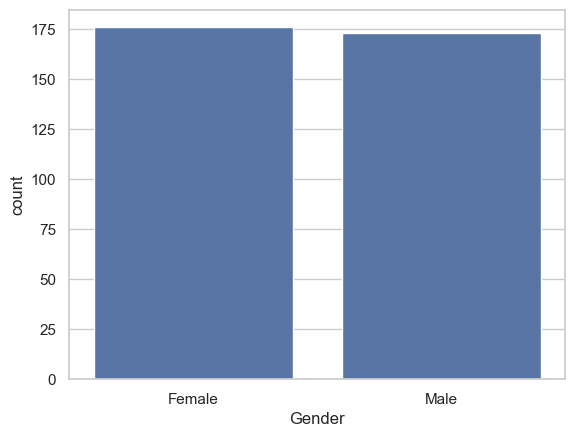

In [73]:

sns.countplot(x='Gender', data=df) 

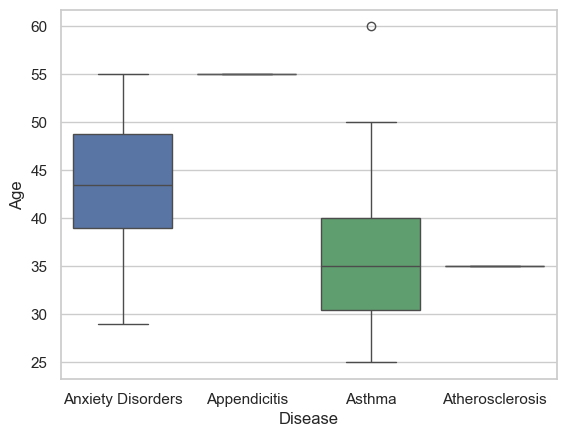

In [74]:
#=0
ls = []
for i in set(df['Disease']):
    ls.append(i)
ls.sort()
ls

for i in ls[4:8]:
    df1=df[df['Disease']==i]
    sns.boxplot(x='Disease',y='Age',data=df1)


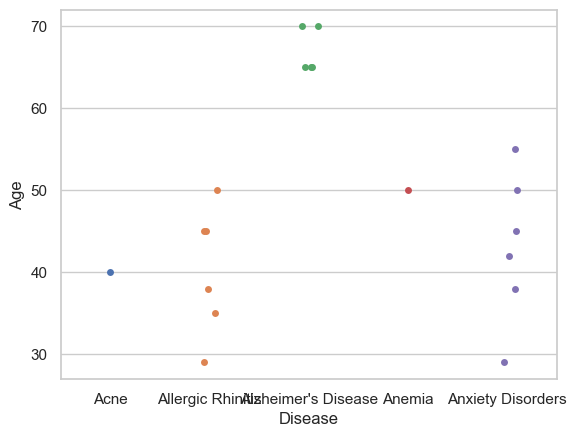

In [75]:
sns.set(style="whitegrid") 

for i in ls[:5]:
    df1=df[df['Disease']==i]
    sns.stripplot(x='Disease',y='Age',data=df1)


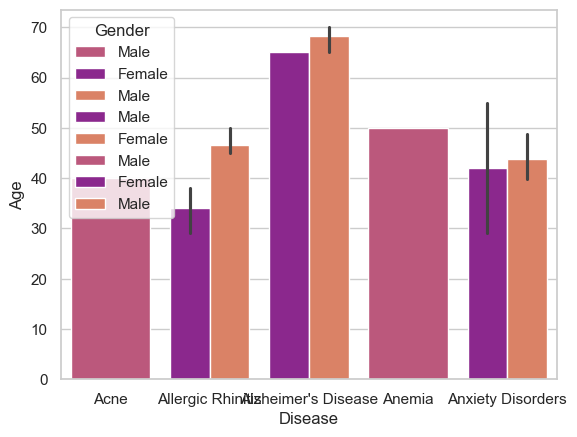

In [76]:


for i in ls[:5]:
    df1=df[df['Disease']==i]
    sns.barplot(x='Disease',y='Age',data=df1,hue='Gender',palette='plasma')


C:\Users\RA\AppData\Local\Temp\ipykernel_24308\1464522600.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Gender', data = df, palette='plasma')


<Axes: xlabel='Gender', ylabel='count'>

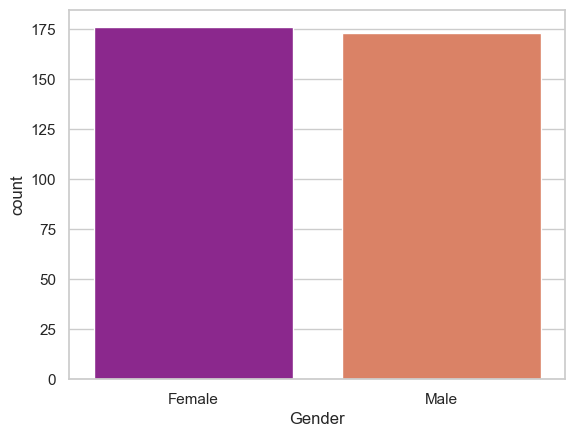

In [77]:
sns.countplot(x ='Gender', data = df, palette='plasma')  

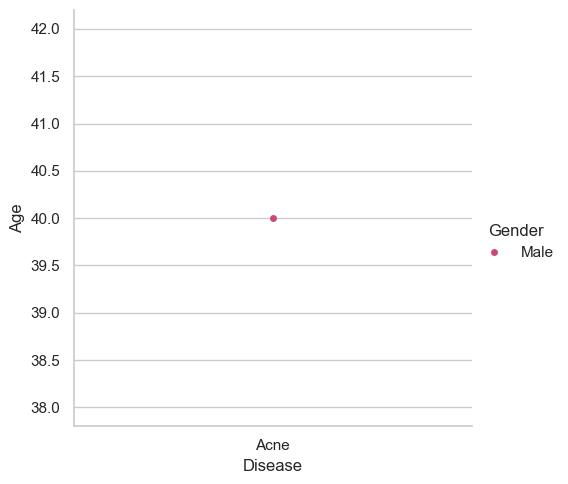

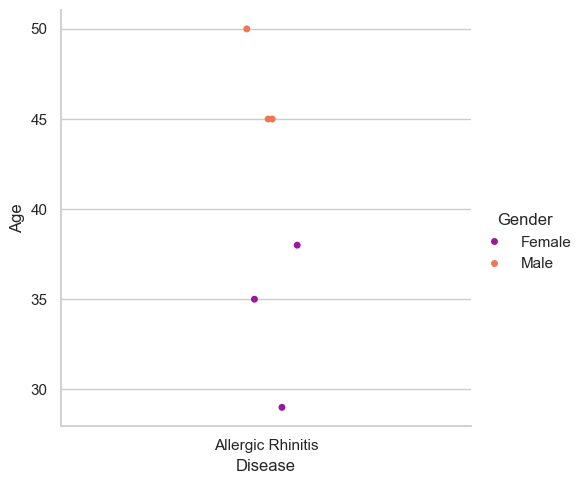

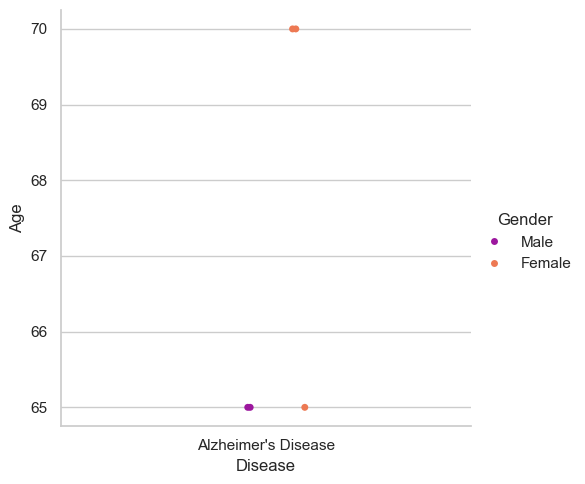

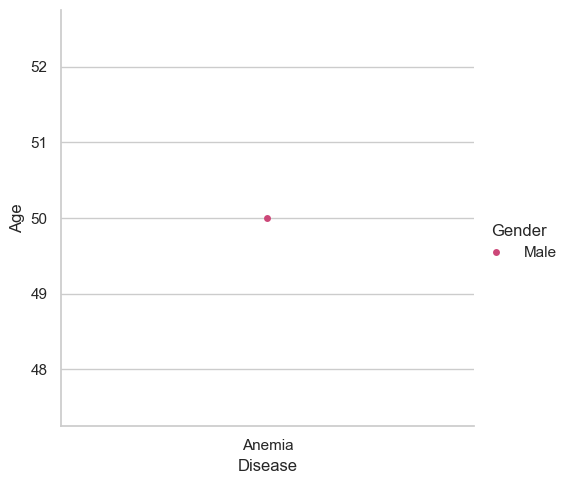

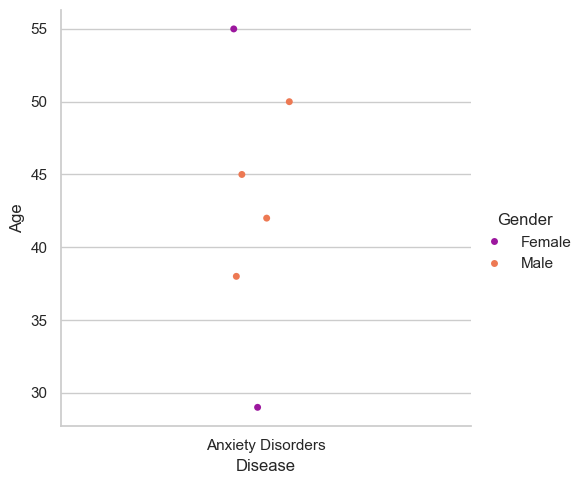

In [78]:
#sns.heatmap(data=df)


for i in ls[:5]:
    df1=df[df['Disease']==i]
    sns.catplot(x='Disease',y='Age',data=df1,hue='Gender',palette='plasma')


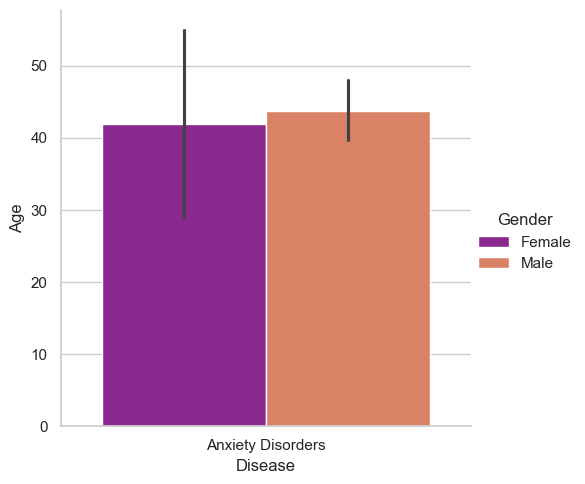

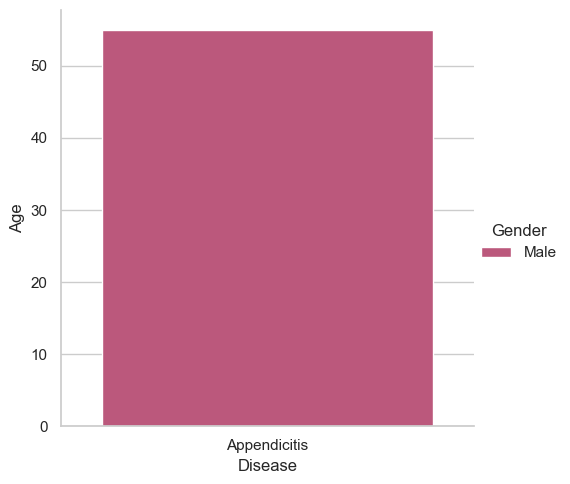

In [79]:


for i in ls[4:6]:
    df1=df[df['Disease']==i]
    sns.catplot(x='Disease',y='Age',data=df1,hue='Gender',palette='plasma',kind='bar')


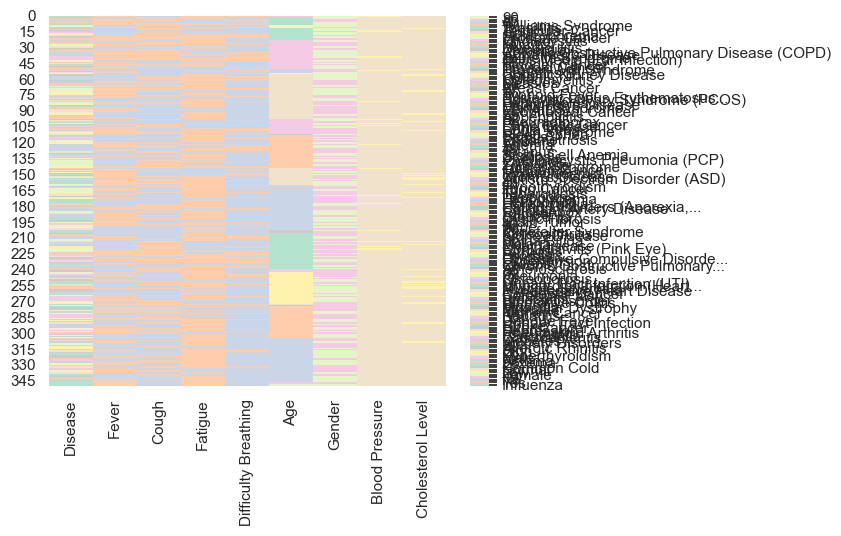

In [80]:

# df1=df.groupby(ls[0:1])

# df1
value_to_int = {j:i for i,j in enumerate(pd.unique(df.values.ravel()))} # like you did
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
cmap = sns.color_palette("Pastel2", n) 
ax = sns.heatmap(df.replace(value_to_int), cmap=cmap) 
# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))                                          
plt.show()

In [81]:

ohc_df = pd.get_dummies(df, columns = ['Fever', 'Cough','Fatigue','Difficulty Breathing','Cholesterol Level','Blood Pressure','Gender'],dtype=int) 
ohc_df
# enc = OneHotEncoder()
# enc_data = pd.DataFrame(enc.fit_transform(df[['Fever','Cough']]).toarray())
# df1 = df.join(enc_data)
# df1.head()


,Disease,Age,Fever_No,Fever_Yes,Cough_No,Cough_Yes,Fatigue_No,Fatigue_Yes,Difficulty Breathing_No,Difficulty Breathing_Yes,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Gender_Female,Gender_Male
0,Influenza,19,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0
1,Common Cold,25,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0
2,Eczema,25,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0
3,Asthma,25,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1
4,Asthma,25,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,Stroke,80,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0
345,Stroke,85,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1
346,Stroke,85,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1
347,Stroke,90,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0


In [82]:
cr_columns = ohc_df.iloc[:,1:]
# cr_columns
corr_matrix = cr_columns.corr().abs()
corr_matrix

,Age,Fever_No,Fever_Yes,Cough_No,Cough_Yes,Fatigue_No,Fatigue_Yes,Difficulty Breathing_No,Difficulty Breathing_Yes,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Gender_Female,Gender_Male
Age,1.000000,0.011255,0.011255,0.104511,0.104511,0.103989,0.103989,0.207296,0.207296,0.180143,0.022179,0.195178,0.132543,0.125751,0.076935,0.041222,0.041222
Fever_No,0.011255,1.000000,1.000000,0.129183,0.129183,0.078882,0.078882,0.262273,0.262273,0.060104,0.078244,0.107591,0.232431,0.130222,0.174930,0.014352,0.014352
Fever_Yes,0.011255,1.000000,1.000000,0.129183,0.129183,0.078882,0.078882,0.262273,0.262273,0.060104,0.078244,0.107591,0.232431,0.130222,0.174930,0.014352,0.014352
Cough_No,0.104511,0.129183,0.129183,1.000000,1.000000,0.171669,0.171669,0.223115,0.223115,0.062397,0.014134,0.054526,0.067875,0.041837,0.086475,0.002498,0.002498
Cough_Yes,0.104511,0.129183,0.129183,1.000000,1.000000,0.171669,0.171669,0.223115,0.223115,0.062397,0.014134,0.054526,0.067875,0.041837,0.086475,0.002498,0.002498
Fatigue_No,0.103989,0.078882,0.078882,0.171669,0.171669,1.000000,1.000000,0.071267,0.071267,0.073342,0.029844,0.091942,0.139339,0.210212,0.046309,0.000499,0.000499
Fatigue_Yes,0.103989,0.078882,0.078882,0.171669,0.171669,1.000000,1.000000,0.071267,0.071267,0.073342,0.029844,0.091942,0.139339,0.210212,0.046309,0.000499,0.000499
Difficulty Breathing_No,0.207296,0.262273,0.262273,0.223115,0.223115,0.071267,0.071267,1.000000,1.000000,0.103807,0.031752,0.085773,0.041065,0.013763,0.035003,0.084175,0.084175
Difficulty Breathing_Yes,0.207296,0.262273,0.262273,0.223115,0.223115,0.071267,0.071267,1.000000,1.000000,0.103807,0.031752,0.085773,0.041065,0.013763,0.035003,0.084175,0.084175
Cholesterol Level_High,0.180143,0.060104,0.060104,0.062397,0.062397,0.073342,0.073342,0.103807,0.103807,1.000000,0.312905,0.822066,0.374054,0.118335,0.321947,0.003288,0.003288


In [87]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# to_drop
for i in to_drop:
    del ohc_df[i]
ohc_df


,Disease,Age,Fever_No,Cough_No,Fatigue_No,Difficulty Breathing_No,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Gender_Female
0,Influenza,19,0,1,0,0,0,0,1,0,1,0,1
1,Common Cold,25,1,0,0,1,0,0,1,0,0,1,1
2,Eczema,25,1,0,0,1,0,0,1,0,0,1,1
3,Asthma,25,0,0,1,0,0,0,1,0,0,1,0
4,Asthma,25,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,Stroke,80,0,1,0,1,1,0,0,1,0,0,1
345,Stroke,85,0,1,0,1,1,0,0,1,0,0,0
346,Stroke,85,0,1,0,1,1,0,0,1,0,0,0
347,Stroke,90,0,1,0,1,1,0,0,1,0,0,1


In [89]:
inputs = ohc_df.drop('Disease',axis = 'columns')
inputs

,Age,Fever_No,Cough_No,Fatigue_No,Difficulty Breathing_No,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Gender_Female
0,19,0,1,0,0,0,0,1,0,1,0,1
1,25,1,0,0,1,0,0,1,0,0,1,1
2,25,1,0,0,1,0,0,1,0,0,1,1
3,25,0,0,1,0,0,0,1,0,0,1,0
4,25,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
344,80,0,1,0,1,1,0,0,1,0,0,1
345,85,0,1,0,1,1,0,0,1,0,0,0
346,85,0,1,0,1,1,0,0,1,0,0,0
347,90,0,1,0,1,1,0,0,1,0,0,1


In [92]:
target = ohc_df['Disease']
target.head(3)

0      Influenza
1    Common Cold
2         Eczema
Name: Disease, dtype: object

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.05)
y_test

301                            Rheumatoid Arthritis
37                                 Bipolar Disorder
40                                       Bronchitis
315    Chronic Obstructive Pulmonary Disease (COPD)
225                                      Bronchitis
166                                   Kidney Cancer
319                                  Diverticulitis
139                                       Psoriasis
128                                      Chickenpox
4                                            Asthma
266                                    Osteoporosis
193                              Multiple Sclerosis
197                                       Pneumonia
297                                    Pancreatitis
304                                  Bladder Cancer
90                                     Pancreatitis
101                                  Kidney Disease
136                                        Lymphoma
Name: Disease, dtype: object

In [108]:
# y_train

In [116]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(inputs,target)


GaussianNB()

In [117]:
model.score(X_test,y_test)

0.3333333333333333

In [120]:
model.predict(X_test[0:10])

array(['Thyroid Cancer', 'Bipolar Disorder', 'Tuberculosis',
       'Chronic Obstructive Pulmonary Disease (COPD)', 'Tuberculosis',
       'Osteoarthritis', 'Dementia', 'Urinary Tract Infection (UTI)',
       'Chickenpox', 'Pneumonia'], dtype='<U44')

In [121]:
y_test

301                            Rheumatoid Arthritis
37                                 Bipolar Disorder
40                                       Bronchitis
315    Chronic Obstructive Pulmonary Disease (COPD)
225                                      Bronchitis
166                                   Kidney Cancer
319                                  Diverticulitis
139                                       Psoriasis
128                                      Chickenpox
4                                            Asthma
266                                    Osteoporosis
193                              Multiple Sclerosis
197                                       Pneumonia
297                                    Pancreatitis
304                                  Bladder Cancer
90                                     Pancreatitis
101                                  Kidney Disease
136                                        Lymphoma
Name: Disease, dtype: object

In [119]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),inputs,target, cv=5)

c:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.14285714, 0.15714286, 0.18571429, 0.14285714, 0.11594203])